## imports

In [1]:
market = 'SFO-LAX'

In [2]:
import datetime
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

In [3]:
cmap_name = "viridis_r"
colors = [cm.get_cmap(cmap_name)(x) for x in np.linspace(0, 1, 5)]

In [4]:
BASE_INPUT_DIR = "../../../data/carrier-consistency"
data_types = ["ow_out_cxr_crude", "ow_out_cxr_nuanced", 
              "rt_out_cxr_crude", "rt_out_cxr_nuanced", 
              "rt_in_cxr_crude", "rt_in_cxr_nuanced",
              "rt_cxr_nuanced"
             ]

# one-ways (out-bound)

In [5]:
data_idx = 0
print(data_types[data_idx])
input_dir = f'{BASE_INPUT_DIR}/{data_types[data_idx]}/'

# there should only be 1 csv file per input folder
for file in os.listdir(input_dir):
    if file.endswith(".csv"):
        file_path = os.path.join(input_dir, file)
        df = pd.read_csv(file_path, header=0)

m_df = df[df['market'] == market]

ow_out_cxr_crude


In [6]:
cxr_col = 'out_cxr'
dow_col = 'out_dt_dow_int'

## overall summary by carrier

In [7]:
cxr_summary = m_df.groupby(cxr_col).agg(
    {'count': 'sum',
     'pct_count': 'sum'}
)
cxr_summary.reset_index(inplace=True)
cxr_summary.sort_values(by='count', ascending=False, inplace=True)
cxr_summary.reset_index(inplace=True, drop=True)

# cxr_summary.head(10)

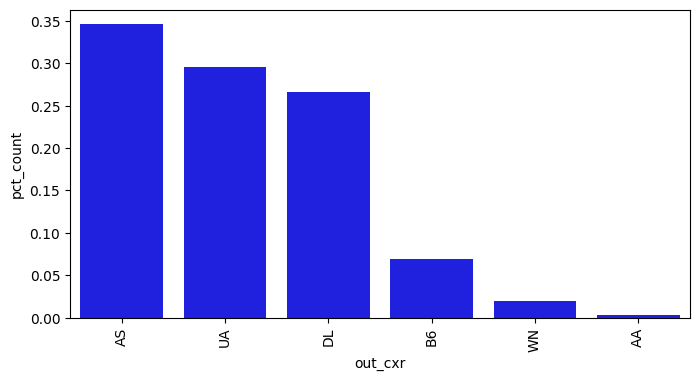

In [8]:
plt.figure(figsize=(8,4))
sns.barplot(cxr_summary, x=cxr_col, y='pct_count', color='blue');
plt.xticks(rotation=90);

In [9]:
top_n_cxr = 4
top_cxr = cxr_summary.loc[:(top_n_cxr-1), cxr_col].to_list()
palette_dict = dict(zip(top_cxr, colors[:top_n_cxr]))

## DTD

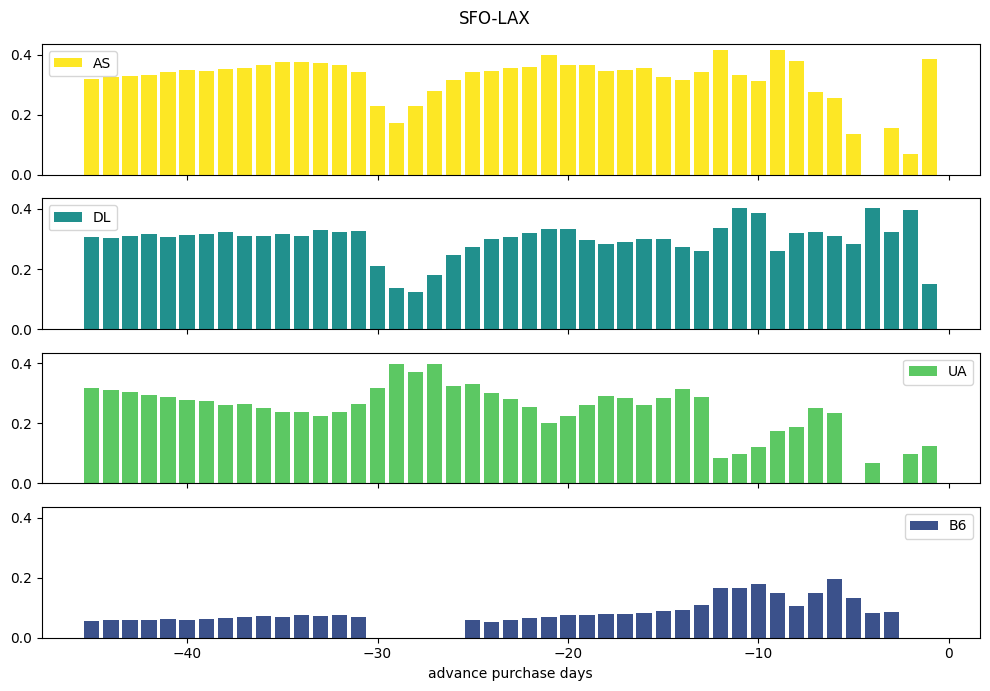

In [10]:
dtd_grp = m_df.groupby(["days_til_dept", cxr_col]).agg({'count': 'sum'})
dtd_grp.reset_index(inplace=True)
dtd_grp.sort_values(by=['days_til_dept', 'count'], ascending=[True, False], inplace=True)
dtd_grp['dtd_rank'] = dtd_grp.groupby("days_til_dept")['count'].rank(method='dense', ascending=False)
dtd_grp['dtd_count'] = dtd_grp.groupby("days_til_dept")['count'].transform('sum')
dtd_grp['pct_dtd_count'] = dtd_grp['count'] / dtd_grp['dtd_count']

top_cxr_dtd_data = dtd_grp[(dtd_grp['dtd_rank'] <= top_n_cxr) & (dtd_grp[cxr_col].isin(top_cxr))]

dtd_cutoff = 45
plot_data = top_cxr_dtd_data[top_cxr_dtd_data['days_til_dept'] <= dtd_cutoff]

fig, axs = plt.subplots(top_n_cxr, 1, sharex=True, sharey=True, figsize=(10,7))
for i, cxr in enumerate(plot_data[cxr_col].unique()):
    cxr_data = plot_data[plot_data[cxr_col] == cxr]

    axs[i].bar(-cxr_data['days_til_dept'], cxr_data['pct_dtd_count'], color=palette_dict[cxr], label=cxr)
    axs[i].legend()
    if i == top_n_cxr-1:
        axs[i].set_xlabel("advance purchase days")

fig.suptitle(market);
fig.tight_layout();

## DOW

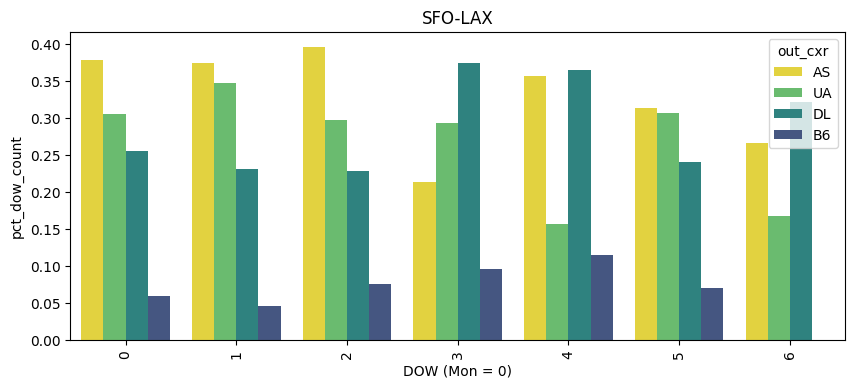

In [11]:
dow_grp = m_df.groupby([dow_col, cxr_col]).agg({'count': 'sum'})
dow_grp.reset_index(inplace=True)
dow_grp.sort_values(by=[dow_col, 'count'], ascending=[True, False], inplace=True)
dow_grp['dow_rank'] = dow_grp.groupby(dow_col)['count'].rank(method='dense', ascending=False)
dow_grp['dow_count'] = dow_grp.groupby(dow_col)['count'].transform('sum')
dow_grp['pct_dow_count'] = dow_grp['count'] / dow_grp['dow_count']

top_cxr_dow_data = dow_grp[(dow_grp['dow_rank'] <= top_n_cxr) & (dow_grp[cxr_col].isin(top_cxr))]

plt.figure(figsize=(10,4))
plot_data = top_cxr_dow_data.copy()
sns.barplot(
    plot_data,
    x=dow_col,
    y='pct_dow_count',
    hue=cxr_col,
    palette=palette_dict
);
plt.xlabel("DOW (Mon = 0)")
plt.xticks(rotation=90);
plt.title(market);

# one-ways - including inter-line

In [12]:
data_idx = 1
print(data_types[data_idx])
input_dir = f'{BASE_INPUT_DIR}/{data_types[data_idx]}/'

# there should only be 1 csv file per input folder
for file in os.listdir(input_dir):
    if file.endswith(".csv"):
        file_path = os.path.join(input_dir, file)
        df = pd.read_csv(file_path, header=0)

m_df = df[df['market'] == market]

cxr_col = 'out_uni_cxr_concat'
dow_col = 'out_dt_dow_int'

ow_out_cxr_nuanced


## overall summary by carrier

In [13]:
cxr_summary = m_df.groupby(cxr_col).agg(
    {'count': 'sum',
     'pct_count': 'sum'}
)
cxr_summary.reset_index(inplace=True)
cxr_summary.sort_values(by='count', ascending=False, inplace=True)
cxr_summary.reset_index(inplace=True, drop=True)

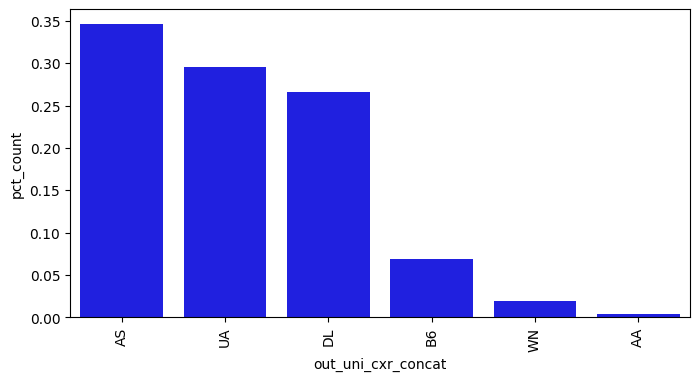

In [14]:
plt.figure(figsize=(8,4))
sns.barplot(cxr_summary, x=cxr_col, y='pct_count', color='blue');
plt.xticks(rotation=90);

In [15]:
top_n_cxr = 4
top_cxr = cxr_summary.loc[:(top_n_cxr-1), 'out_uni_cxr_concat'].to_list()
palette_dict = dict(zip(top_cxr, colors[:top_n_cxr]))

## DTD

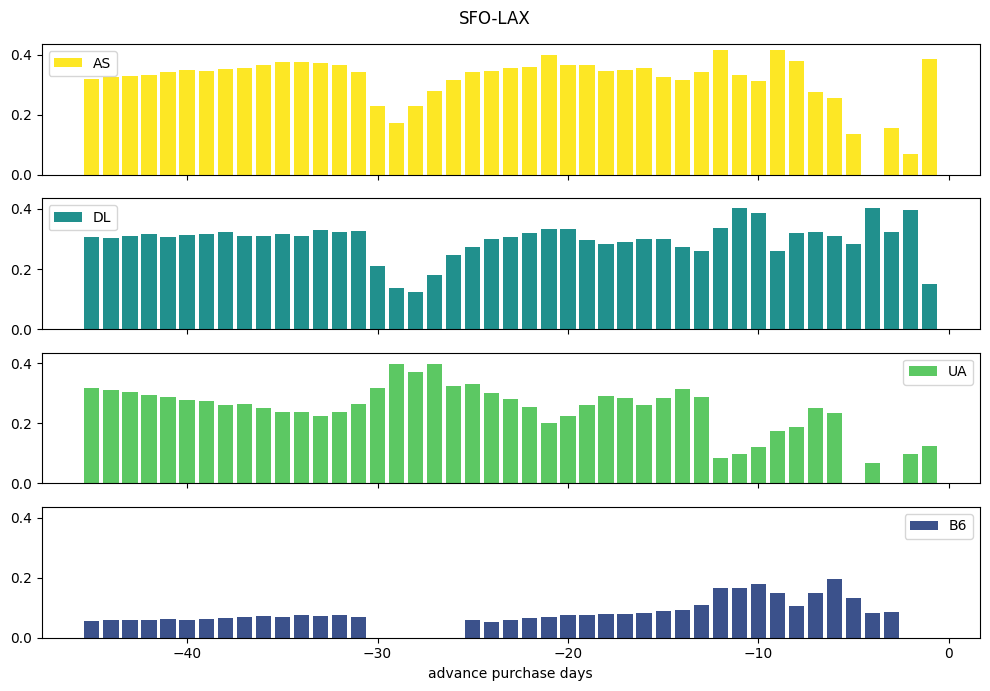

In [16]:
dtd_grp = m_df.groupby(["days_til_dept", cxr_col]).agg({'count': 'sum'})
dtd_grp.reset_index(inplace=True)
dtd_grp.sort_values(by=['days_til_dept', 'count'], ascending=[True, False], inplace=True)
dtd_grp['dtd_rank'] = dtd_grp.groupby("days_til_dept")['count'].rank(method='dense', ascending=False)
dtd_grp['dtd_count'] = dtd_grp.groupby("days_til_dept")['count'].transform('sum')
dtd_grp['pct_dtd_count'] = dtd_grp['count'] / dtd_grp['dtd_count']

top_cxr_dtd_data = dtd_grp[(dtd_grp['dtd_rank'] <= top_n_cxr) & (dtd_grp[cxr_col].isin(top_cxr))]

dtd_cutoff = 45
plot_data = top_cxr_dtd_data[top_cxr_dtd_data['days_til_dept'] <= dtd_cutoff]

fig, axs = plt.subplots(top_n_cxr, 1, sharex=True, sharey=True, figsize=(10,7))
for i, cxr in enumerate(plot_data[cxr_col].unique()):
    cxr_data = plot_data[plot_data[cxr_col] == cxr]

    axs[i].bar(-cxr_data['days_til_dept'], cxr_data['pct_dtd_count'], color=palette_dict[cxr], label=cxr)
    axs[i].legend()
    if i == top_n_cxr-1:
        axs[i].set_xlabel("advance purchase days")

fig.suptitle(market);
fig.tight_layout();

## DOW

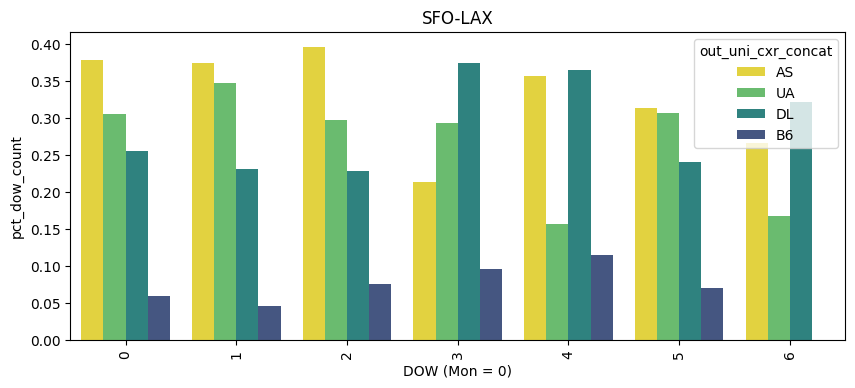

In [17]:
dow_grp = m_df.groupby(['out_dt_dow_int', 'out_uni_cxr_concat']).agg({'count': 'sum'})
dow_grp.reset_index(inplace=True)
dow_grp.sort_values(by=['out_dt_dow_int', 'count'], ascending=[True, False], inplace=True)
dow_grp['dow_rank'] = dow_grp.groupby("out_dt_dow_int")['count'].rank(method='dense', ascending=False)
dow_grp['dow_count'] = dow_grp.groupby("out_dt_dow_int")['count'].transform('sum')
dow_grp['pct_dow_count'] = dow_grp['count'] / dow_grp['dow_count']

top_cxr_dow_data = dow_grp[(dow_grp['dow_rank'] <= top_n_cxr) & (dow_grp['out_uni_cxr_concat'].isin(top_cxr))]

plt.figure(figsize=(10,4))
plot_data = top_cxr_dow_data.copy()
sns.barplot(
    plot_data,
    x='out_dt_dow_int',
    y='pct_dow_count',
    hue='out_uni_cxr_concat',
    palette=palette_dict
);
plt.xlabel("DOW (Mon = 0)")
plt.xticks(rotation=90);
plt.title(market);

# round-trip, out-bound

In [18]:
data_idx = 2
print(data_types[data_idx])
input_dir = f'{BASE_INPUT_DIR}/{data_types[data_idx]}/'

# there should only be 1 csv file per input folder
for file in os.listdir(input_dir):
    if file.endswith(".csv"):
        file_path = os.path.join(input_dir, file)
        df = pd.read_csv(file_path, header=0)
        
m_df = df[df['market'] == market]

rt_out_cxr_crude


In [19]:
cxr_col = 'out_cxr'
dow_col = 'out_dt_dow_int'

## overall summary by carrier

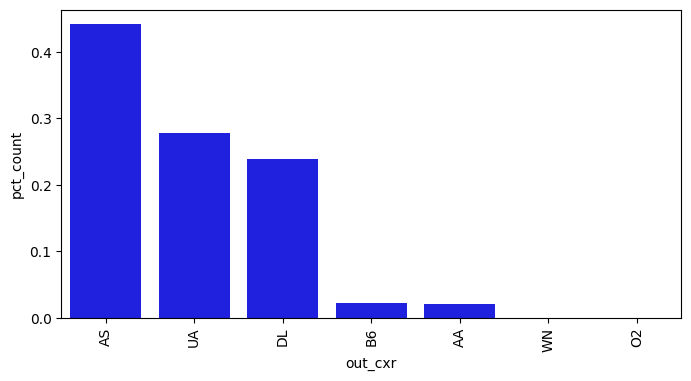

In [20]:
cxr_summary = m_df.groupby(cxr_col).agg(
    {'count': 'sum',
     'pct_count': 'sum'}
)
cxr_summary.reset_index(inplace=True)
cxr_summary.sort_values(by='count', ascending=False, inplace=True)
cxr_summary.reset_index(inplace=True, drop=True)

# cxr_summary.head(10)

plt.figure(figsize=(8,4))
sns.barplot(cxr_summary, x=cxr_col, y='pct_count', color='blue');
plt.xticks(rotation=90);

In [21]:
top_n_cxr = 5
top_cxr = cxr_summary.loc[:(top_n_cxr-1), cxr_col].to_list()
palette_dict = dict(zip(top_cxr, colors[:top_n_cxr]))

## DTD

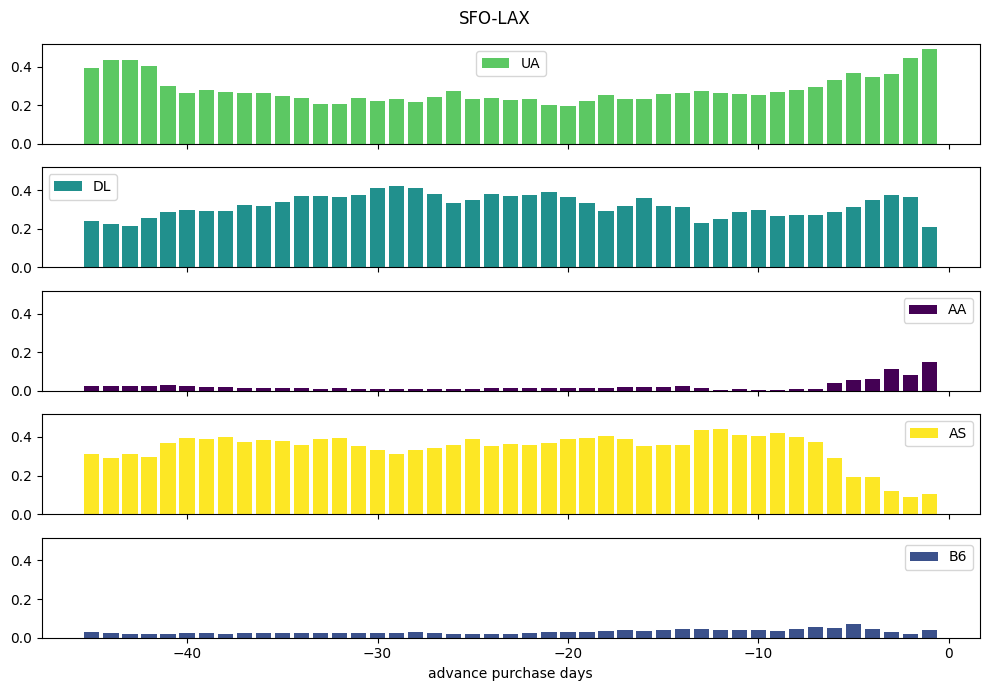

In [22]:
dtd_grp = m_df.groupby(["days_til_dept", cxr_col]).agg({'count': 'sum'})
dtd_grp.reset_index(inplace=True)
dtd_grp.sort_values(by=['days_til_dept', 'count'], ascending=[True, False], inplace=True)
dtd_grp['dtd_rank'] = dtd_grp.groupby("days_til_dept")['count'].rank(method='dense', ascending=False)
dtd_grp['dtd_count'] = dtd_grp.groupby("days_til_dept")['count'].transform('sum')
dtd_grp['pct_dtd_count'] = dtd_grp['count'] / dtd_grp['dtd_count']

top_cxr_dtd_data = dtd_grp[(dtd_grp['dtd_rank'] <= top_n_cxr) & (dtd_grp[cxr_col].isin(top_cxr))]

dtd_cutoff = 45
plot_data = top_cxr_dtd_data[top_cxr_dtd_data['days_til_dept'] <= dtd_cutoff]

fig, axs = plt.subplots(top_n_cxr, 1, sharex=True, sharey=True, figsize=(10,7))
for i, cxr in enumerate(plot_data[cxr_col].unique()):
    cxr_data = plot_data[plot_data[cxr_col] == cxr]

    axs[i].bar(-cxr_data['days_til_dept'], cxr_data['pct_dtd_count'], color=palette_dict[cxr], label=cxr)
    axs[i].legend()
    if i == top_n_cxr-1:
        axs[i].set_xlabel("advance purchase days")

fig.suptitle(market);
fig.tight_layout();

## DOW

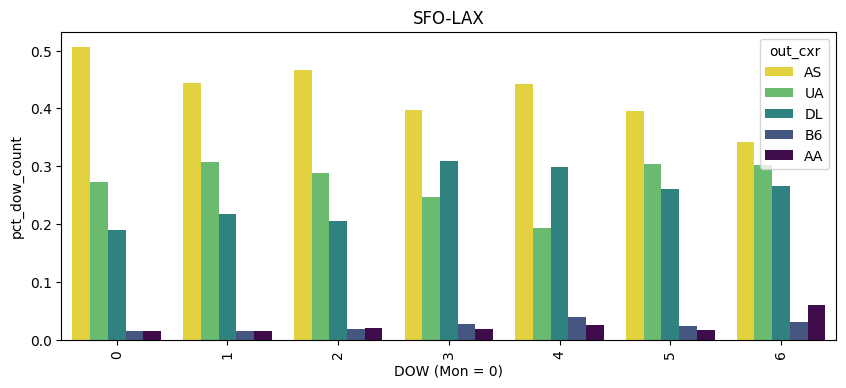

In [23]:
dow_grp = m_df.groupby([dow_col, cxr_col]).agg({'count': 'sum'})
dow_grp.reset_index(inplace=True)
dow_grp.sort_values(by=[dow_col, 'count'], ascending=[True, False], inplace=True)
dow_grp['dow_rank'] = dow_grp.groupby(dow_col)['count'].rank(method='dense', ascending=False)
dow_grp['dow_count'] = dow_grp.groupby(dow_col)['count'].transform('sum')
dow_grp['pct_dow_count'] = dow_grp['count'] / dow_grp['dow_count']

top_cxr_dow_data = dow_grp[(dow_grp['dow_rank'] <= top_n_cxr) & (dow_grp[cxr_col].isin(top_cxr))]

plt.figure(figsize=(10,4))
plot_data = top_cxr_dow_data.copy()
sns.barplot(
    plot_data,
    x=dow_col,
    y='pct_dow_count',
    hue=cxr_col, 
    palette=palette_dict
);
plt.xlabel("DOW (Mon = 0)")
plt.xticks(rotation=90);
plt.title(market);

# round-trip, out-bound, including inter-lines

In [24]:
data_idx = 3
print(data_types[data_idx])
input_dir = f'{BASE_INPUT_DIR}/{data_types[data_idx]}/'

# there should only be 1 csv file per input folder
for file in os.listdir(input_dir):
    if file.endswith(".csv"):
        file_path = os.path.join(input_dir, file)
        df = pd.read_csv(file_path, header=0)
        
m_df = df[df['market'] == market]

cxr_col = 'out_uni_cxr_concat'
dow_col = 'out_dt_dow_int'

rt_out_cxr_nuanced


## overall summary by carrier

In [25]:
cxr_summary = m_df.groupby(cxr_col).agg(
    {'count': 'sum',
     'pct_count': 'sum'}
)
cxr_summary.reset_index(inplace=True)
cxr_summary.sort_values(by='count', ascending=False, inplace=True)
cxr_summary.reset_index(inplace=True, drop=True)

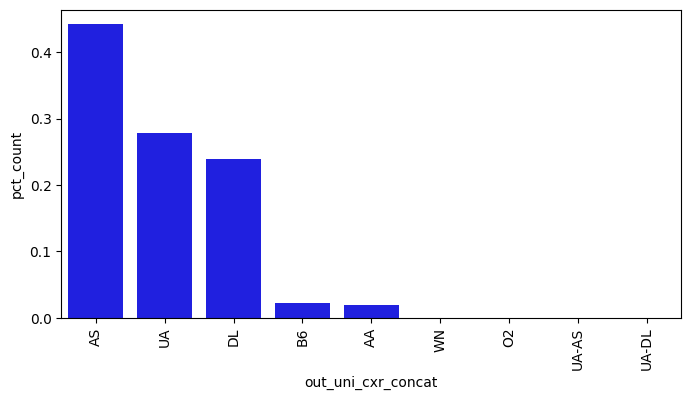

In [26]:
# cxr_summary.head(10)

plt.figure(figsize=(8,4))
sns.barplot(cxr_summary, x=cxr_col, y='pct_count', color='blue');
plt.xticks(rotation=90);

In [27]:
top_n_cxr = 5
top_cxr = cxr_summary.loc[:(top_n_cxr-1), cxr_col].to_list()
palette_dict = dict(zip(top_cxr, colors[:top_n_cxr]))

## DTD

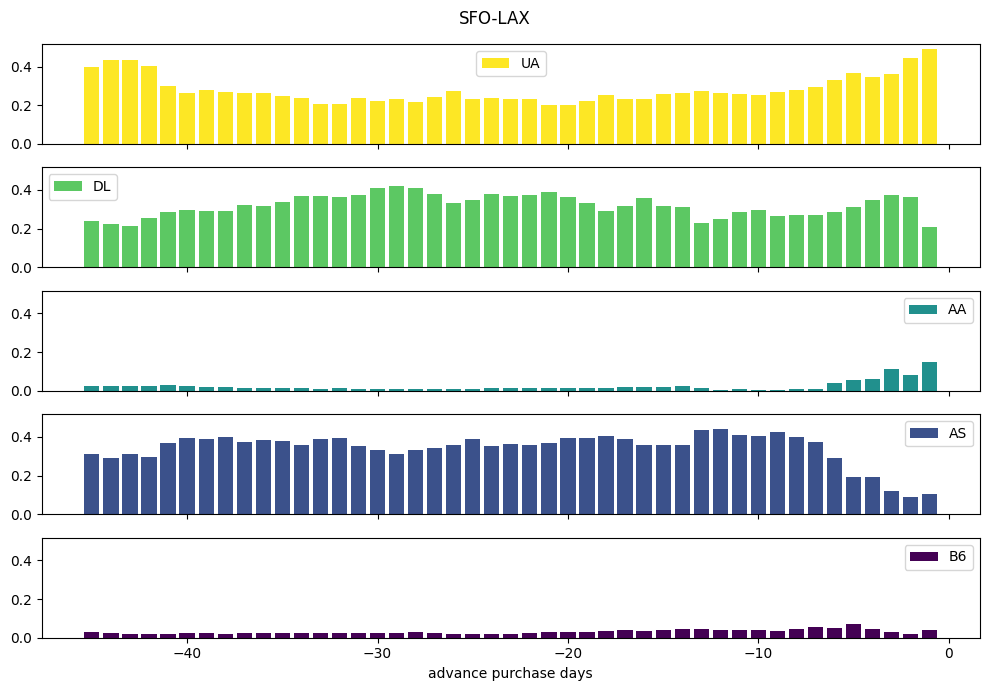

In [28]:
dtd_grp = m_df.groupby(["days_til_dept", cxr_col]).agg({'count': 'sum'})
dtd_grp.reset_index(inplace=True)
dtd_grp.sort_values(by=['days_til_dept', 'count'], ascending=[True, False], inplace=True)
dtd_grp['dtd_rank'] = dtd_grp.groupby("days_til_dept")['count'].rank(method='dense', ascending=False)
dtd_grp['dtd_count'] = dtd_grp.groupby("days_til_dept")['count'].transform('sum')
dtd_grp['pct_dtd_count'] = dtd_grp['count'] / dtd_grp['dtd_count']

top_cxr_dtd_data = dtd_grp[(dtd_grp['dtd_rank'] <= top_n_cxr) & (dtd_grp[cxr_col].isin(top_cxr))]

dtd_cutoff = 45
plot_data = top_cxr_dtd_data[top_cxr_dtd_data['days_til_dept'] <= dtd_cutoff]

fig, axs = plt.subplots(top_n_cxr, 1, sharex=True, sharey=True, figsize=(10,7))
for i, cxr in enumerate(plot_data[cxr_col].unique()):
    cxr_data = plot_data[plot_data[cxr_col] == cxr]

    axs[i].bar(-cxr_data['days_til_dept'], cxr_data['pct_dtd_count'], color=colors[i], label=cxr)
    axs[i].legend()
    if i == top_n_cxr-1:
        axs[i].set_xlabel("advance purchase days")

fig.suptitle(market);
fig.tight_layout();

## DOW

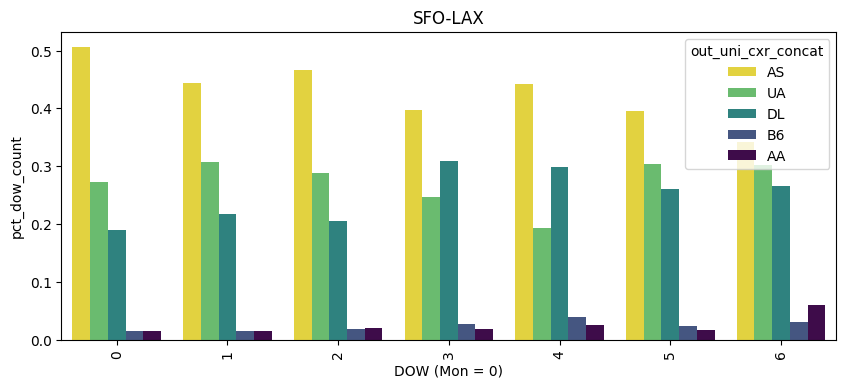

In [29]:
dow_grp = m_df.groupby([dow_col, cxr_col]).agg({'count': 'sum'})
dow_grp.reset_index(inplace=True)
dow_grp.sort_values(by=[dow_col, 'count'], ascending=[True, False], inplace=True)
dow_grp['dow_rank'] = dow_grp.groupby(dow_col)['count'].rank(method='dense', ascending=False)
dow_grp['dow_count'] = dow_grp.groupby(dow_col)['count'].transform('sum')
dow_grp['pct_dow_count'] = dow_grp['count'] / dow_grp['dow_count']

top_cxr_dow_data = dow_grp[(dow_grp['dow_rank'] <= top_n_cxr) & (dow_grp[cxr_col].isin(top_cxr))]

plt.figure(figsize=(10,4))
plot_data = top_cxr_dow_data.copy()
sns.barplot(
    plot_data,
    x=dow_col,
    y='pct_dow_count',
    hue=cxr_col, palette=colors[:top_n_cxr]
);
plt.xlabel("DOW (Mon = 0)")
plt.xticks(rotation=90);
plt.title(market);

# round-trip, in-bound

In [30]:
data_idx = 4
print(data_types[data_idx])
input_dir = f'{BASE_INPUT_DIR}/{data_types[data_idx]}/'

# there should only be 1 csv file per input folder
for file in os.listdir(input_dir):
    if file.endswith(".csv"):
        file_path = os.path.join(input_dir, file)
        df = pd.read_csv(file_path, header=0)
        
m_df = df[df['market'] == market]

cxr_col = 'in_cxr'
dow_col = 'in_dt_dow_int'

rt_in_cxr_crude


## overall summary by carrier

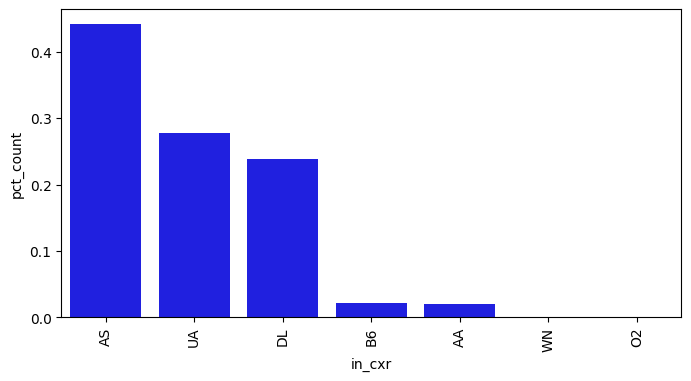

In [31]:
cxr_summary = m_df.groupby(cxr_col).agg(
    {'count': 'sum',
     'pct_count': 'sum'}
)
cxr_summary.reset_index(inplace=True)
cxr_summary.sort_values(by='count', ascending=False, inplace=True)
cxr_summary.reset_index(inplace=True, drop=True)

# cxr_summary.head(10)

plt.figure(figsize=(8,4))
sns.barplot(cxr_summary, x=cxr_col, y='pct_count', color='blue');
plt.xticks(rotation=90);

In [32]:
top_n_cxr = 4
top_cxr = cxr_summary.loc[:(top_n_cxr-1), cxr_col].to_list()
palette_dict = dict(zip(top_cxr, colors[:top_n_cxr]))

## DTD

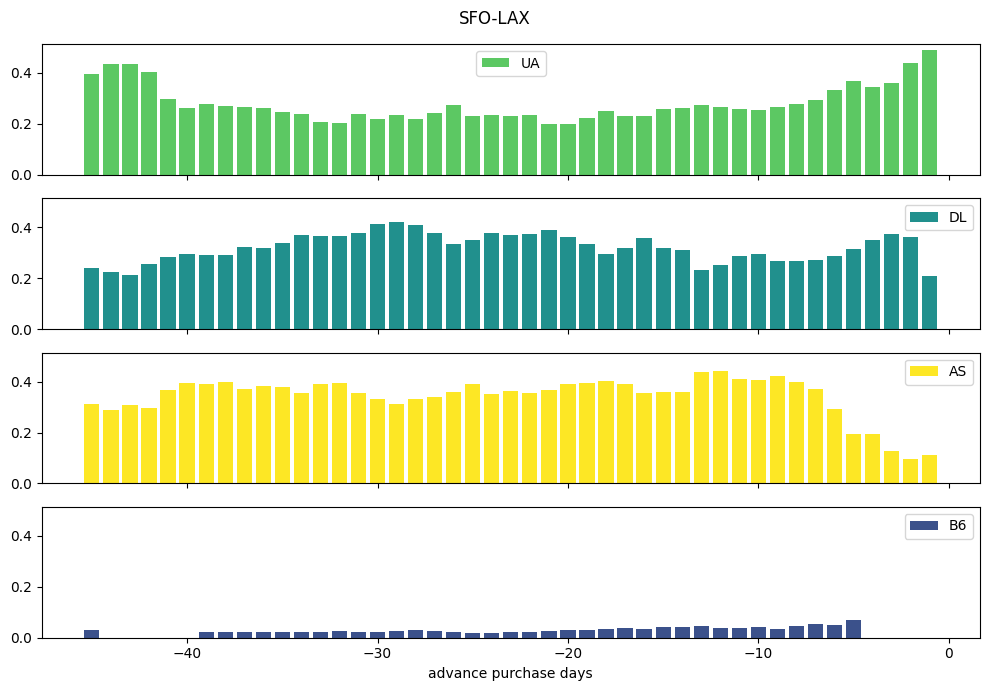

In [33]:
dtd_grp = m_df.groupby(["days_til_dept", cxr_col]).agg({'count': 'sum'})
dtd_grp.reset_index(inplace=True)
dtd_grp.sort_values(by=['days_til_dept', 'count'], ascending=[True, False], inplace=True)
dtd_grp['dtd_rank'] = dtd_grp.groupby("days_til_dept")['count'].rank(method='dense', ascending=False)
dtd_grp['dtd_count'] = dtd_grp.groupby("days_til_dept")['count'].transform('sum')
dtd_grp['pct_dtd_count'] = dtd_grp['count'] / dtd_grp['dtd_count']

top_cxr_dtd_data = dtd_grp[(dtd_grp['dtd_rank'] <= top_n_cxr) & (dtd_grp[cxr_col].isin(top_cxr))]

dtd_cutoff = 45
plot_data = top_cxr_dtd_data[top_cxr_dtd_data['days_til_dept'] <= dtd_cutoff]

fig, axs = plt.subplots(top_n_cxr, 1, sharex=True, sharey=True, figsize=(10,7))
for i, cxr in enumerate(plot_data[cxr_col].unique()):
    cxr_data = plot_data[plot_data[cxr_col] == cxr]

    axs[i].bar(-cxr_data['days_til_dept'], cxr_data['pct_dtd_count'], color=palette_dict[cxr], label=cxr)
    axs[i].legend()
    if i == top_n_cxr-1:
        axs[i].set_xlabel("advance purchase days")

fig.suptitle(market);
fig.tight_layout();


## DOW

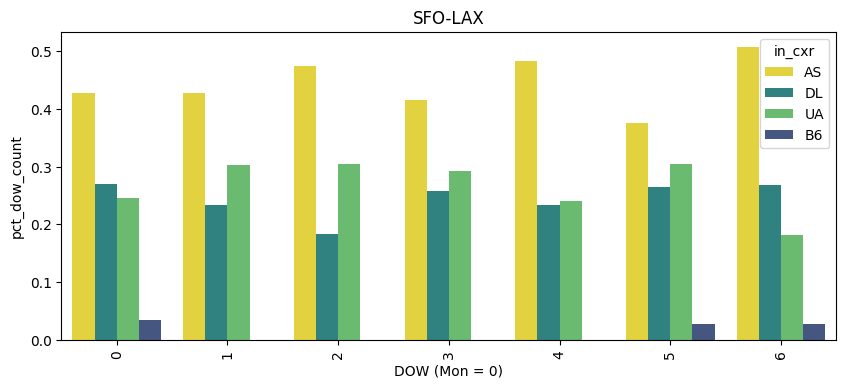

In [34]:
dow_grp = m_df.groupby([dow_col, cxr_col]).agg({'count': 'sum'})
dow_grp.reset_index(inplace=True)
dow_grp.sort_values(by=[dow_col, 'count'], ascending=[True, False], inplace=True)
dow_grp['dow_rank'] = dow_grp.groupby(dow_col)['count'].rank(method='dense', ascending=False)
dow_grp['dow_count'] = dow_grp.groupby(dow_col)['count'].transform('sum')
dow_grp['pct_dow_count'] = dow_grp['count'] / dow_grp['dow_count']

top_cxr_dow_data = dow_grp[(dow_grp['dow_rank'] <= top_n_cxr) & (dow_grp[cxr_col].isin(top_cxr))]

plt.figure(figsize=(10,4))
plot_data = top_cxr_dow_data.copy()
sns.barplot(
    plot_data,
    x=dow_col,
    y='pct_dow_count',
    hue=cxr_col,
    palette=palette_dict
);
plt.xlabel("DOW (Mon = 0)")
plt.xticks(rotation=90);
plt.title(market);

# round-trip, in-bound, including inter-line

In [35]:
data_idx = 5
print(data_types[data_idx])
input_dir = f'{BASE_INPUT_DIR}/{data_types[data_idx]}/'

# there should only be 1 csv file per input folder
for file in os.listdir(input_dir):
    if file.endswith(".csv"):
        file_path = os.path.join(input_dir, file)
        df = pd.read_csv(file_path, header=0)
        
m_df = df[df['market'] == market]

rt_in_cxr_nuanced


In [36]:
m_df.head()

,market,round_trip,days_til_dept,out_dt_dow_int,in_dt_dow_int,in_uni_cxr_concat,count,count_market,pct_count,cum_pct
557723,SFO-LAX,1,63,2,2,AS,4368,4782012,0.000913,0.000913
557724,SFO-LAX,1,71,2,2,AS,4201,4782012,0.000879,0.001792
557725,SFO-LAX,1,64,2,2,AS,3915,4782012,0.000819,0.002611
557726,SFO-LAX,1,69,2,2,AS,3786,4782012,0.000792,0.003402
557727,SFO-LAX,1,72,2,2,AS,3624,4782012,0.000758,0.004160


In [37]:
cxr_col = 'in_uni_cxr_concat'
dow_col = 'in_dt_dow_int'

## overall summary by carrier

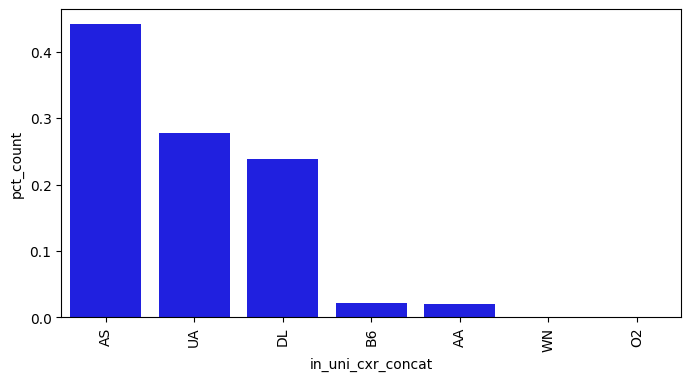

In [38]:
cxr_summary = m_df.groupby(cxr_col).agg(
    {'count': 'sum',
     'pct_count': 'sum'}
)
cxr_summary.reset_index(inplace=True)
cxr_summary.sort_values(by='count', ascending=False, inplace=True)
cxr_summary.reset_index(inplace=True, drop=True)

# cxr_summary.head(10)

plt.figure(figsize=(8,4))
sns.barplot(cxr_summary, x=cxr_col, y='pct_count', color='blue');
plt.xticks(rotation=90);

In [39]:
top_n_cxr = 4
top_cxr = cxr_summary.loc[:(top_n_cxr-1), cxr_col].to_list()
palette_dict = dict(zip(top_cxr, colors[:top_n_cxr]))

## DTD

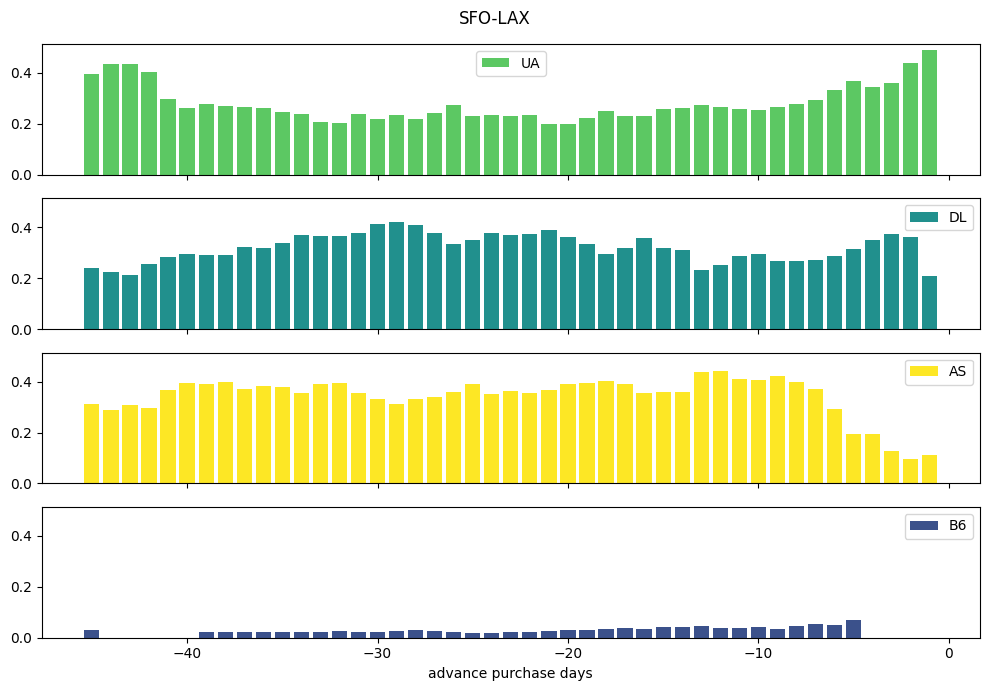

In [40]:
dtd_grp = m_df.groupby(["days_til_dept", cxr_col]).agg({'count': 'sum'})
dtd_grp.reset_index(inplace=True)
dtd_grp.sort_values(by=['days_til_dept', 'count'], ascending=[True, False], inplace=True)
dtd_grp['dtd_rank'] = dtd_grp.groupby("days_til_dept")['count'].rank(method='dense', ascending=False)
dtd_grp['dtd_count'] = dtd_grp.groupby("days_til_dept")['count'].transform('sum')
dtd_grp['pct_dtd_count'] = dtd_grp['count'] / dtd_grp['dtd_count']

top_cxr_dtd_data = dtd_grp[(dtd_grp['dtd_rank'] <= top_n_cxr) & (dtd_grp[cxr_col].isin(top_cxr))]

dtd_cutoff = 45
plot_data = top_cxr_dtd_data[top_cxr_dtd_data['days_til_dept'] <= dtd_cutoff]

fig, axs = plt.subplots(top_n_cxr, 1, sharex=True, sharey=True, figsize=(10,7))
for i, cxr in enumerate(plot_data[cxr_col].unique()):
    cxr_data = plot_data[plot_data[cxr_col] == cxr]

    axs[i].bar(-cxr_data['days_til_dept'], cxr_data['pct_dtd_count'], color=palette_dict[cxr], label=cxr)
    axs[i].legend()
    if i == top_n_cxr-1:
        axs[i].set_xlabel("advance purchase days")

fig.suptitle(market);
fig.tight_layout();

## DOW

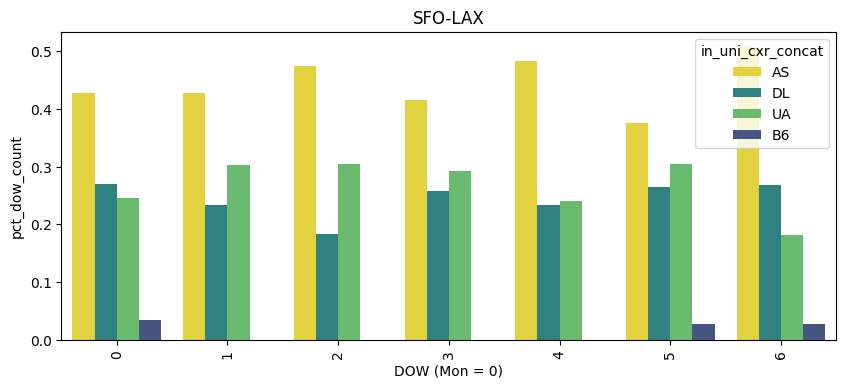

In [41]:
dow_grp = m_df.groupby([dow_col, cxr_col]).agg({'count': 'sum'})
dow_grp.reset_index(inplace=True)
dow_grp.sort_values(by=[dow_col, 'count'], ascending=[True, False], inplace=True)
dow_grp['dow_rank'] = dow_grp.groupby(dow_col)['count'].rank(method='dense', ascending=False)
dow_grp['dow_count'] = dow_grp.groupby(dow_col)['count'].transform('sum')
dow_grp['pct_dow_count'] = dow_grp['count'] / dow_grp['dow_count']

top_cxr_dow_data = dow_grp[(dow_grp['dow_rank'] <= top_n_cxr) & (dow_grp[cxr_col].isin(top_cxr))]

plt.figure(figsize=(10,4))
plot_data = top_cxr_dow_data.copy()
sns.barplot(
    plot_data,
    x=dow_col,
    y='pct_dow_count',
    hue=cxr_col,
    palette=palette_dict
);
plt.xlabel("DOW (Mon = 0)")
plt.xticks(rotation=90);
plt.title(market);

# round-trip, out + in

In [42]:
data_idx = 6
print(data_types[data_idx])
input_dir = f'{BASE_INPUT_DIR}/{data_types[data_idx]}/'

# there should only be 1 csv file per input folder
for file in os.listdir(input_dir):
    if file.endswith(".csv"):
        file_path = os.path.join(input_dir, file)
        df = pd.read_csv(file_path, header=0)
        
m_df = df[df['market'] == market]

rt_cxr_nuanced


In [43]:
cxr_col = 'rt_cxrs'
# dow_col = 'out_dt_dow_int'

## overall summary by carrier

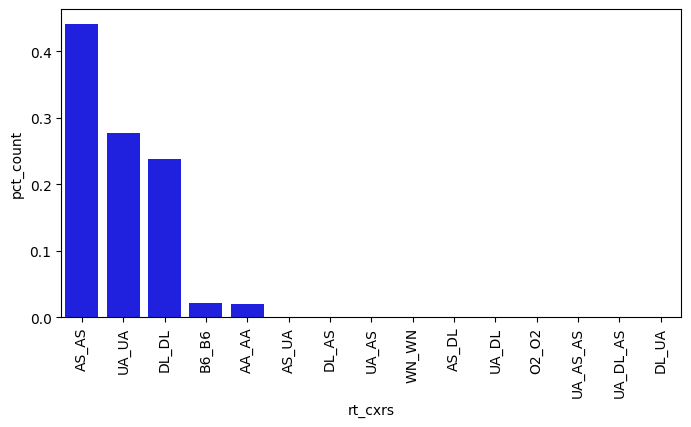

In [44]:
max_num_cxr = 25
cxr_summary = m_df.groupby(cxr_col).agg(
    {'count': 'sum',
     'pct_count': 'sum'}
)
cxr_summary.reset_index(inplace=True)
cxr_summary.sort_values(by='count', ascending=False, inplace=True)
cxr_summary.reset_index(inplace=True, drop=True)
cxr_summary = cxr_summary[:max_num_cxr]

# cxr_summary.head(10)

plt.figure(figsize=(8,4))
sns.barplot(cxr_summary, x=cxr_col, y='pct_count', color='blue');
plt.xticks(rotation=90);

In [45]:
top_n_cxr = 4
top_cxr = cxr_summary.loc[:(top_n_cxr-1), cxr_col].to_list()
palette_dict = dict(zip(top_cxr, colors[:top_n_cxr]))

## DTD

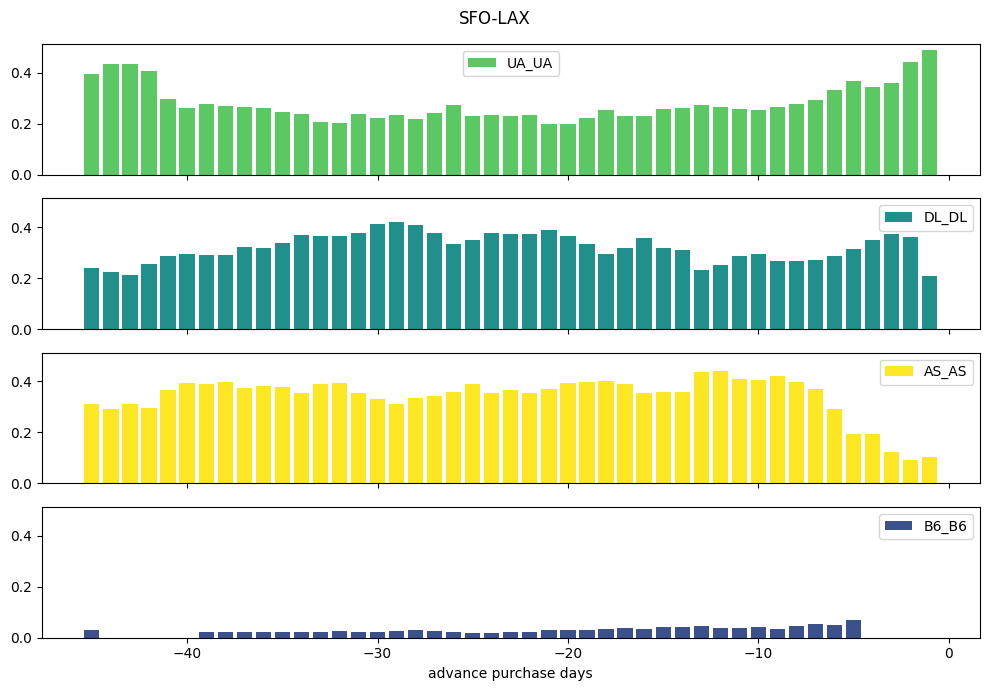

In [46]:
dtd_grp = m_df.groupby(["days_til_dept", cxr_col]).agg({'count': 'sum'})
dtd_grp.reset_index(inplace=True)
dtd_grp.sort_values(by=['days_til_dept', 'count'], ascending=[True, False], inplace=True)
dtd_grp['dtd_rank'] = dtd_grp.groupby("days_til_dept")['count'].rank(method='dense', ascending=False)
dtd_grp['dtd_count'] = dtd_grp.groupby("days_til_dept")['count'].transform('sum')
dtd_grp['pct_dtd_count'] = dtd_grp['count'] / dtd_grp['dtd_count']

top_cxr_dtd_data = dtd_grp[(dtd_grp['dtd_rank'] <= top_n_cxr) & (dtd_grp[cxr_col].isin(top_cxr))]

dtd_cutoff = 45
plot_data = top_cxr_dtd_data[top_cxr_dtd_data['days_til_dept'] <= dtd_cutoff]

fig, axs = plt.subplots(top_n_cxr, 1, sharex=True, sharey=True, figsize=(10,7))
for i, cxr in enumerate(plot_data[cxr_col].unique()):
    cxr_data = plot_data[plot_data[cxr_col] == cxr]

    axs[i].bar(-cxr_data['days_til_dept'], cxr_data['pct_dtd_count'], color=palette_dict[cxr], label=cxr)
    axs[i].legend()
    if i == top_n_cxr-1:
        axs[i].set_xlabel("advance purchase days")

fig.suptitle(market);
fig.tight_layout();

## DOW

In [47]:
dow_grp = m_df.groupby(["out_dt_dow_int", "in_dt_dow_int", cxr_col]).agg({'count': 'sum'})
dow_grp.reset_index(inplace=True)
dow_grp.sort_values(by=[dow_col, 'count'], ascending=[True, False], inplace=True)
dow_grp['pct_count'] = dow_grp['count'] / dow_grp['count'].sum()

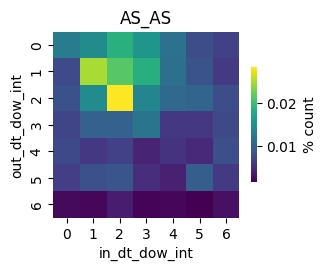

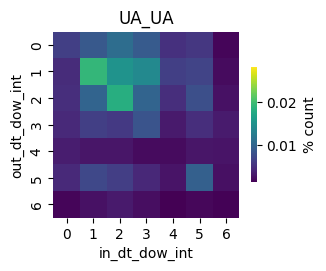

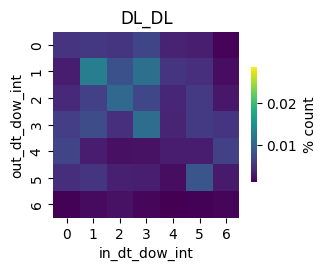

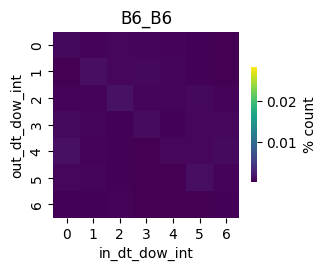

In [48]:
for cxr in top_cxr:
    cxr_dow_summary = dow_grp[dow_grp[cxr_col] == cxr]
    pvt = cxr_dow_summary.pivot(index='out_dt_dow_int', columns='in_dt_dow_int', values='pct_count')
    plt.figure(figsize=(3,3))
    sns.heatmap(pvt, cmap='viridis', square=True, cbar_kws={'shrink': 0.5, 'label': "% count"}, 
                vmax=max(dow_grp['pct_count']))
    plt.title(cxr)